In [1]:
import openpyxl
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import math
from matplotlib import dates
import pandas as pd 
#!pip install prophet
#from prophet import Prophet
import os 
import sklearn

from sklearn.linear_model import LinearRegression
print("Hello github")


Hello github


In [5]:
Surgery_filepath="Surgery.csv"

In [6]:
pd.read_csv(Surgery_filepath)
Surgery_data = pd.read_csv(Surgery_filepath,index_col='SurgDate', parse_dates=True)


In [7]:
Surgery_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2011-10-10 to 2012-09-14
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DOW     241 non-null    object
 1   T - 28  241 non-null    int64 
 2   T - 21  241 non-null    int64 
 3   T - 14  241 non-null    int64 
 4   T - 13  241 non-null    int64 
 5   T - 12  241 non-null    int64 
 6   T - 11  241 non-null    int64 
 7   T - 10  241 non-null    int64 
 8   T - 9   241 non-null    int64 
 9   T - 8   241 non-null    int64 
 10  T - 7   241 non-null    int64 
 11  T - 6   241 non-null    int64 
 12  T - 5   241 non-null    int64 
 13  T - 4   241 non-null    int64 
 14  T - 3   241 non-null    int64 
 15  T - 2   241 non-null    int64 
 16  T - 1   241 non-null    int64 
 17  Actual  241 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 35.8+ KB


In [8]:
Surgery_data.describe()

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,34.261411,47.240664,64.439834,67.817427,70.502075,72.365145,74.946058,78.041494,82.336100,86.000000,89.269710,92.091286,94.688797,97.373444,101.165975,110.008299,116.381743
std,9.387610,11.321079,13.495891,14.200934,14.873109,14.970786,15.096674,15.054842,15.594841,16.089075,16.911962,17.370472,17.468264,17.589816,17.547004,17.785057,17.629388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
25%,28.000000,41.000000,58.000000,62.000000,64.000000,66.000000,68.000000,71.000000,76.000000,80.000000,82.000000,84.000000,88.000000,91.000000,95.000000,102.000000,110.000000
50%,35.000000,48.000000,65.000000,69.000000,72.000000,74.000000,77.000000,79.000000,85.000000,87.000000,91.000000,94.000000,97.000000,100.000000,103.000000,112.000000,117.000000
75%,40.000000,55.000000,73.000000,76.000000,80.000000,82.000000,84.000000,86.000000,92.000000,95.000000,99.000000,103.000000,106.000000,107.000000,111.000000,119.000000,126.000000
max,57.000000,73.000000,93.000000,99.000000,102.000000,106.000000,106.000000,112.000000,113.000000,118.000000,121.000000,121.000000,124.000000,127.000000,131.000000,139.000000,145.000000


In [9]:
Surgery_data.nunique()

DOW        5
T - 28    43
T - 21    47
T - 14    52
T - 13    51
T - 12    54
T - 11    56
T - 10    59
T - 9     56
T - 8     56
T - 7     56
T - 6     58
T - 5     60
T - 4     58
T - 3     58
T - 2     58
T - 1     57
Actual    53
dtype: int64

In [76]:
Surgery_data.head(10)

,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
SurgDate,,,,,,,,,,,,,,,,,,
2011-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
2011-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2011-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
2011-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
2011-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106
2011-10-17,Mon,41,56,65,69,72,73,77,78,78,80,86,85,86,92,96,102,111
2011-10-18,Tue,44,55,69,74,79,83,83,83,93,92,96,103,105,105,107,114,122
2011-10-19,Wed,32,40,62,66,71,73,73,84,86,87,89,96,96,96,102,119,127
2011-10-20,Thu,33,44,62,66,67,67,79,77,88,90,98,98,98,105,111,118,116


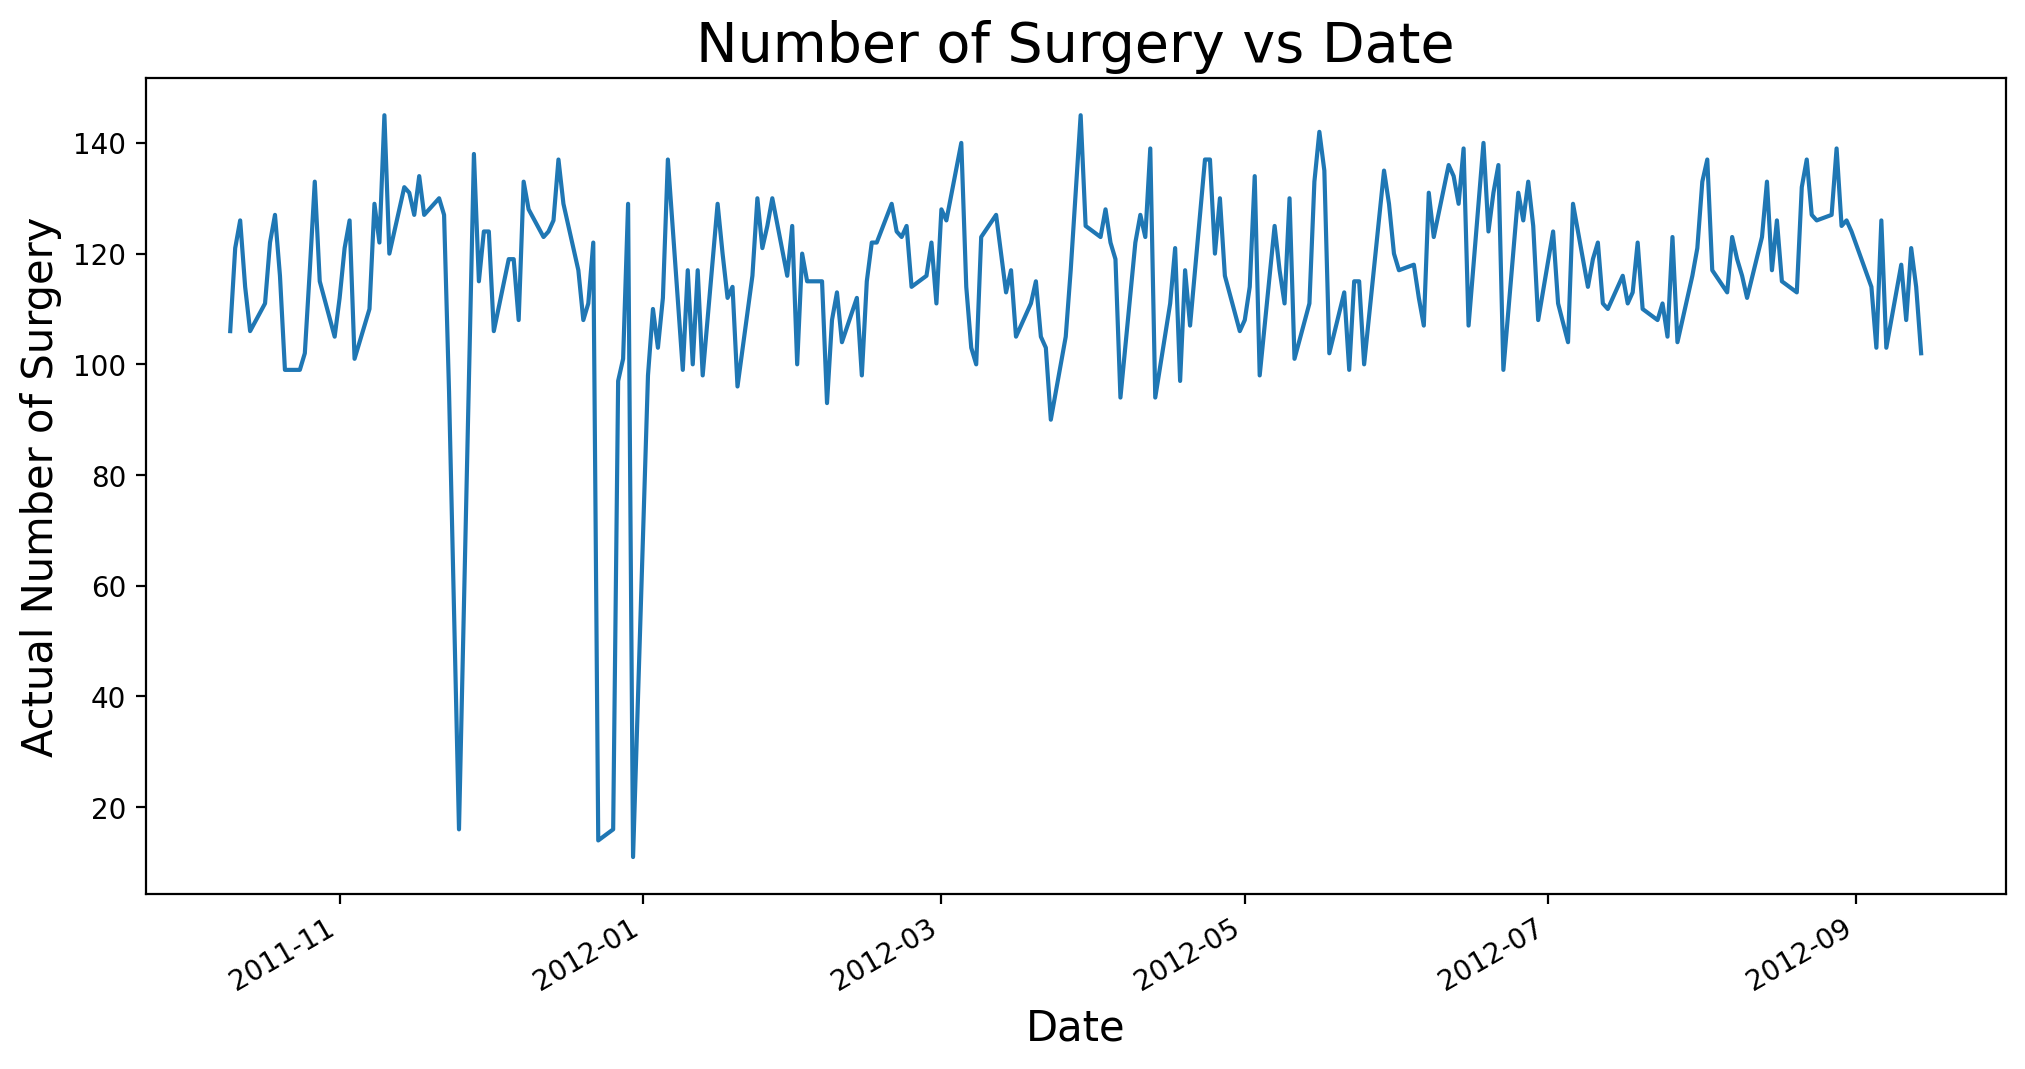

In [10]:
fig=plt.figure(figsize=(12,6), dpi=200)
ax=Surgery_data['Actual'].plot();



plt.title('Number of Surgery vs Date',fontsize=20)
plt.ylabel('Actual Number of Surgery',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.savefig("savetest.png", dpi=200)

#cyclical pattern with no significant trend 
# stationary time series

<Figure size 1200x600 with 0 Axes>

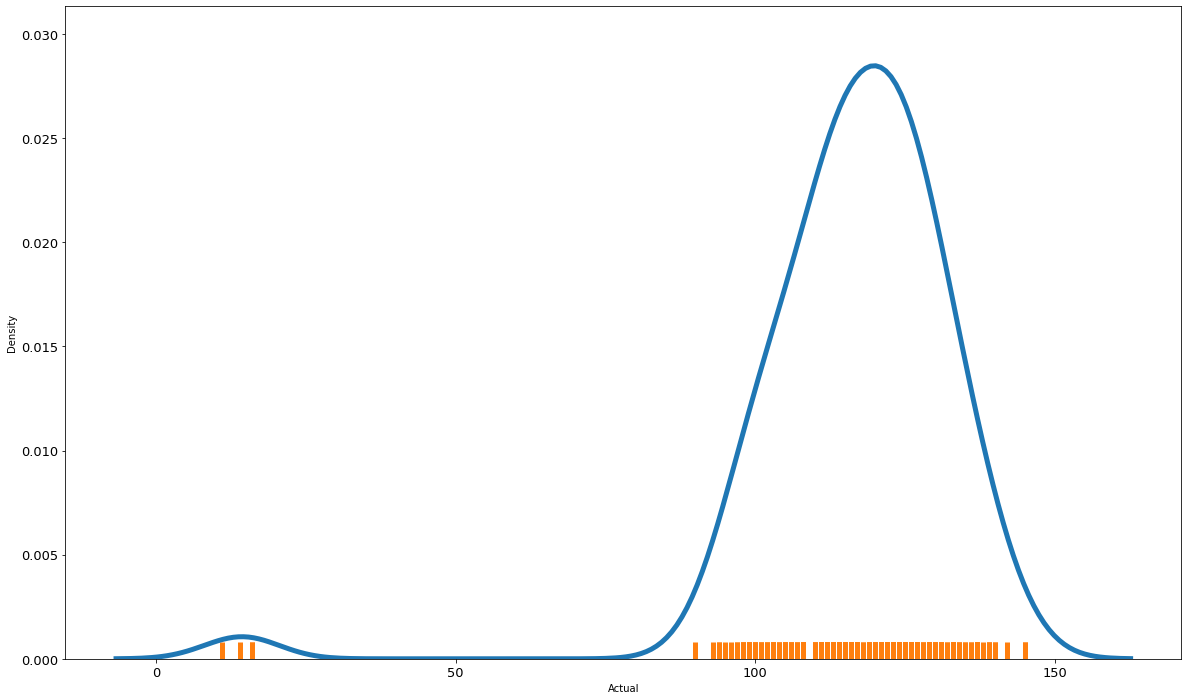

In [34]:
fig=plt.figure(figsize=(12,6), dpi=100)
plt.figure(figsize=(20,12))
sns.kdeplot(Surgery_data['Actual'],linewidth=5)
sns.rugplot(Surgery_data['Actual'],linewidth=5)
plt.rc('xtick', labelsize=50) 
plt.rc('ytick', labelsize=20) 

plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

fig.savefig("filename.png", dpi=100)

C:\Users\amina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


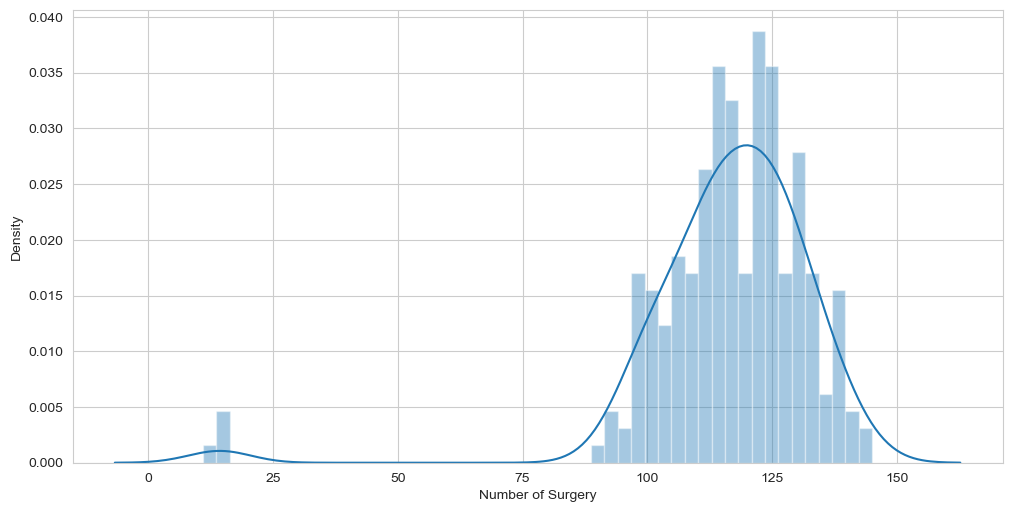

In [285]:
fig=plt.figure(figsize=(12,6), dpi=100)

sns.distplot(Surgery_data['Actual'],bins=50,axlabel='Number of Surgery');
fig.savefig("filename.png", dpi=100)

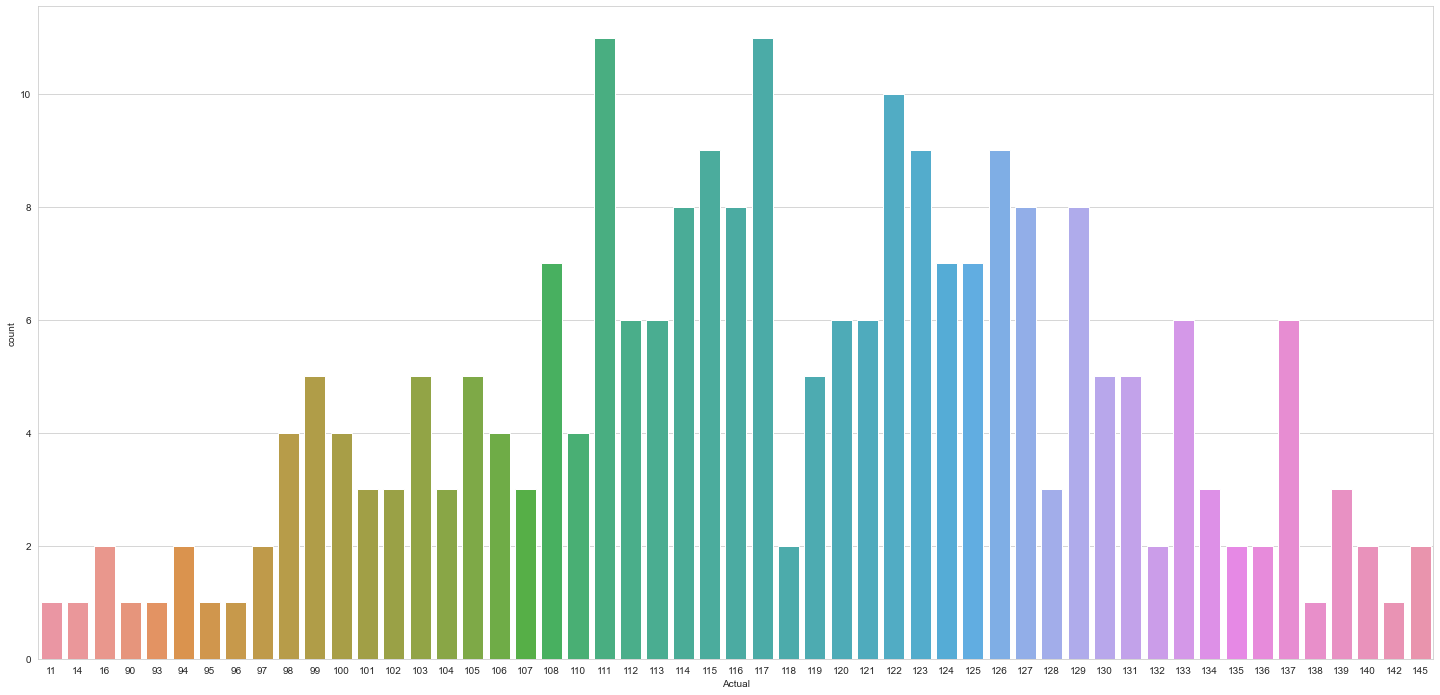

In [290]:
fig=plt.figure(figsize=(25,12))
sns.countplot(x='Actual',data=Surgery_data);
fig.savefig("filename.png", dpi=100)

In [287]:
Surgery_data.corr()

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
T - 28,1.000000,0.894700,0.766981,0.761258,0.764272,0.769680,0.744281,0.718607,0.697891,0.669865,0.669421,0.679711,0.685468,0.686128,0.655022,0.629432,0.608290
T - 21,0.894700,1.000000,0.871427,0.862506,0.849120,0.839669,0.821875,0.807351,0.794639,0.769279,0.771311,0.766765,0.766230,0.763745,0.742956,0.718364,0.702459
T - 14,0.766981,0.871427,1.000000,0.975593,0.940374,0.918844,0.913420,0.924774,0.919929,0.900452,0.890108,0.863536,0.846024,0.845696,0.848112,0.821478,0.800877
T - 13,0.761258,0.862506,0.975593,1.000000,0.977337,0.955026,0.941554,0.940412,0.931122,0.914450,0.911955,0.895554,0.878267,0.870565,0.862705,0.835040,0.812730
T - 12,0.764272,0.849120,0.940374,0.977337,1.000000,0.986618,0.962074,0.941533,0.922158,0.904064,0.912807,0.919413,0.910958,0.893899,0.876955,0.847387,0.818714
T - 11,0.769680,0.839669,0.918844,0.955026,0.986618,1.000000,0.979289,0.947764,0.918142,0.896470,0.906488,0.920257,0.923938,0.908863,0.885674,0.851878,0.819855
T - 10,0.744281,0.821875,0.913420,0.941554,0.962074,0.979289,1.000000,0.973322,0.935192,0.912204,0.918598,0.922247,0.927982,0.926197,0.907966,0.871200,0.842193
T - 9,0.718607,0.807351,0.924774,0.940412,0.941533,0.947764,0.973322,1.000000,0.971532,0.955061,0.945678,0.933364,0.925826,0.924528,0.922874,0.895139,0.872890
T - 8,0.697891,0.794639,0.919929,0.931122,0.922158,0.918142,0.935192,0.971532,1.000000,0.984829,0.969236,0.948335,0.930065,0.920350,0.927708,0.909233,0.887675
T - 7,0.669865,0.769279,0.900452,0.914450,0.904064,0.896470,0.912204,0.955061,0.984829,1.000000,0.984542,0.960000,0.938392,0.925503,0.934284,0.918124,0.895779


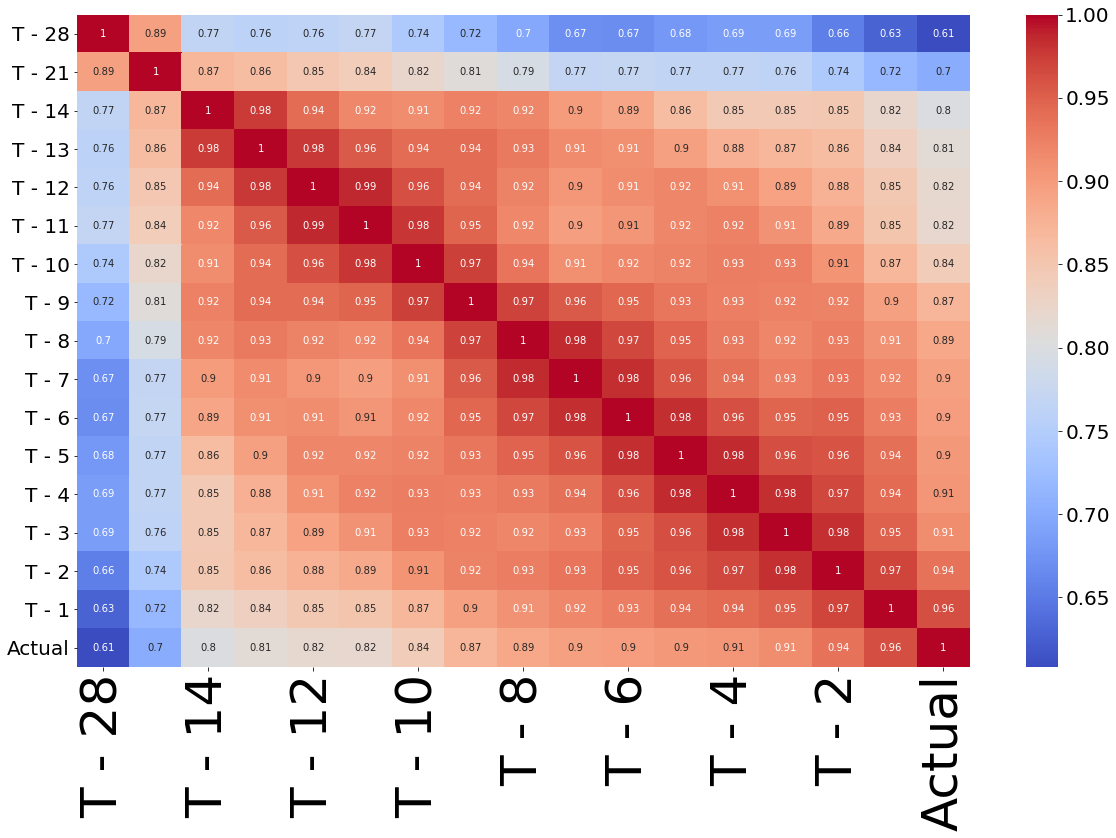

In [41]:
fig=plt.figure(figsize=(20,12))
sns.heatmap(Surgery_data.corr(),cmap='coolwarm',annot=True);
fig.savefig("filename.png", dpi=100)
cmap="Greens"

<Figure size 1440x1080 with 0 Axes>

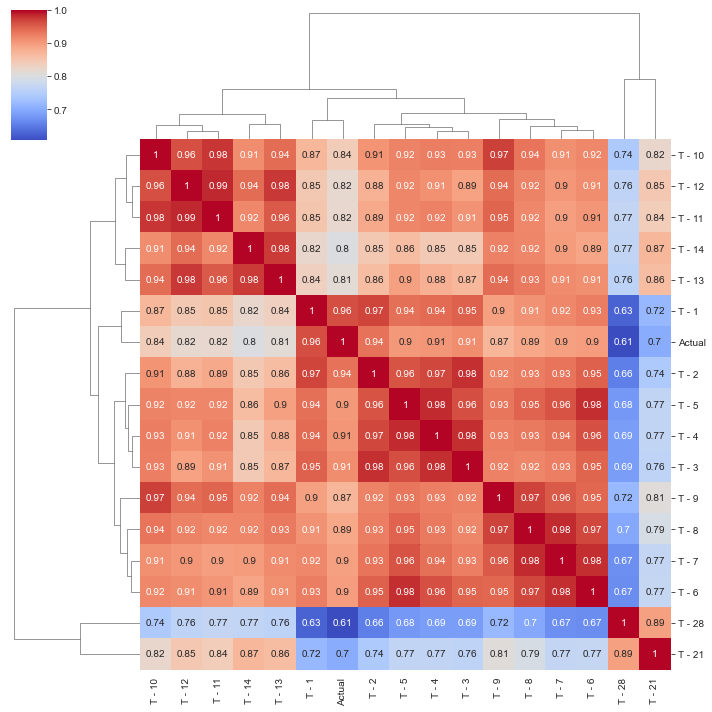

In [120]:
fig=plt.figure(figsize=(20,15))
sns.clustermap(Surgery_data.corr(),cmap='coolwarm',annot=True);
fig.savefig("filename.png", dpi=100)

C:\Users\amina\anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


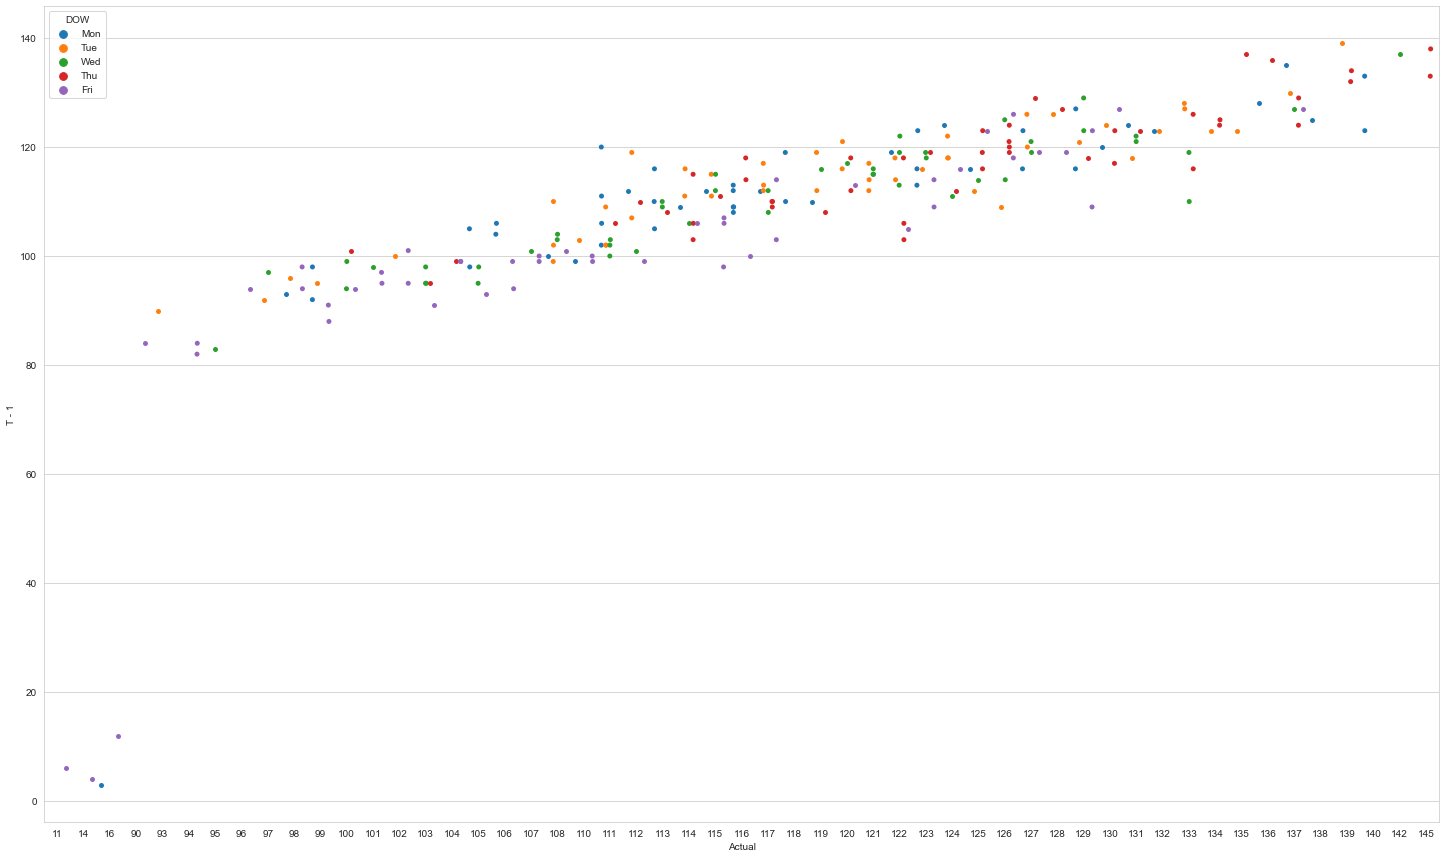

In [122]:
fig=plt.figure(figsize=(25,15))
sns.stripplot(x="Actual", y="T - 1", data=Surgery_data,hue='DOW',split=True)
fig.savefig("filename.png", dpi=200)

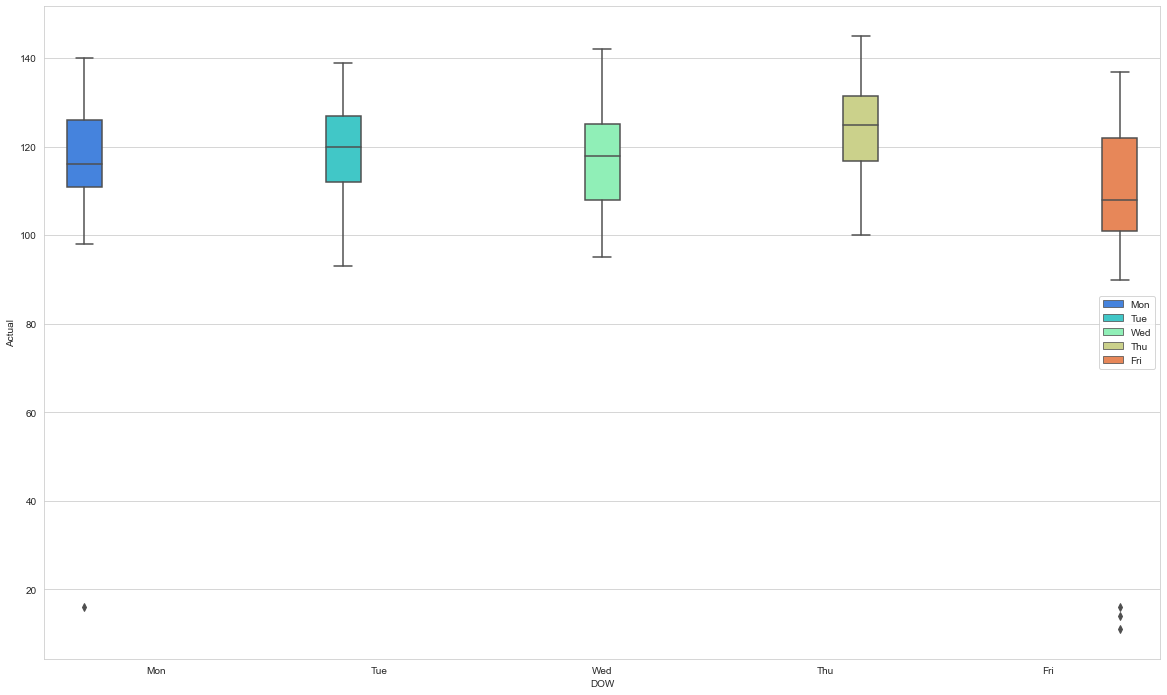

In [123]:
fig=plt.figure(figsize=(20,12))
sns.boxplot(x='DOW',y="Actual", data=Surgery_data,palette='rainbow',hue='DOW').legend(loc=0) 
fig.savefig("filename.png", dpi=200)

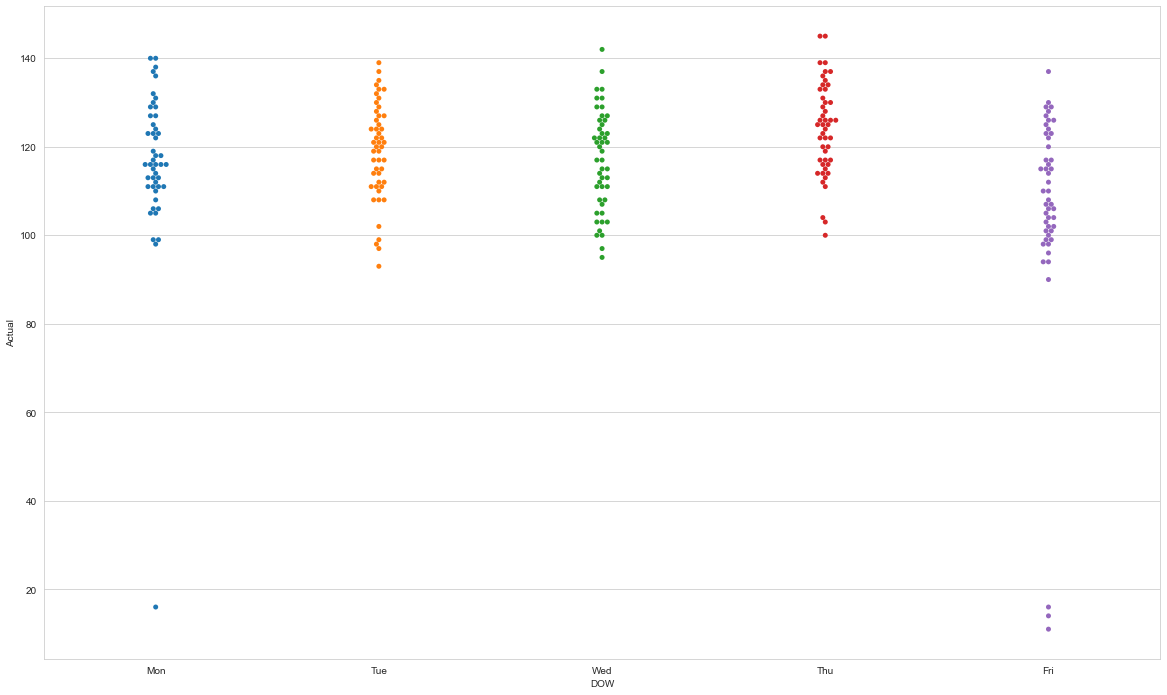

In [124]:
fig=plt.figure(figsize=(20,12))
sns.set_style('whitegrid')
sns.swarmplot(x="DOW", y="Actual", data=Surgery_data)
fig.savefig("filename.png", dpi=200)

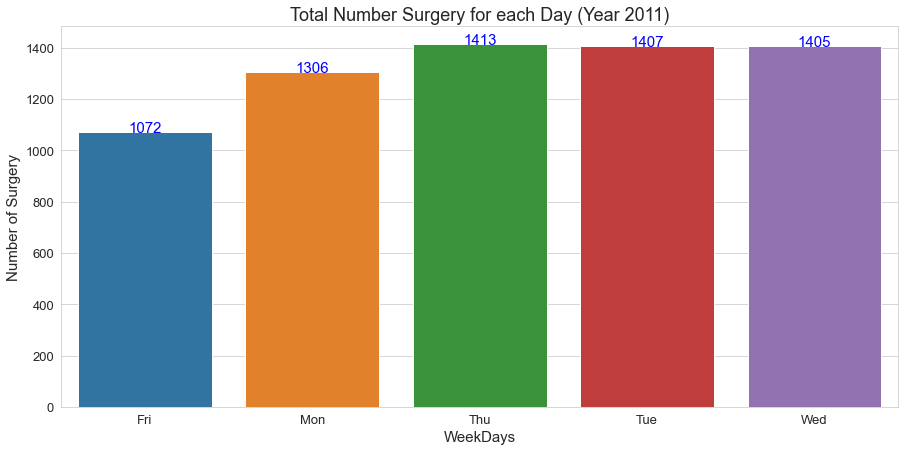

In [125]:
fig=plt.figure(figsize=(15,7))
sns.set_style("whitegrid")
plt.ticklabel_format(style='plain')

groupedvalues=Surgery2011.groupby('DOW').sum().reset_index()

h=sns.barplot(x='DOW',y='Actual',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    h.text(row.name,row.Actual, round(row.Actual), color='blue', ha="center",fontsize=15)
    
h.set_xlabel("WeekDays" , fontsize=15)
h.set_ylabel("Number of Surgery" , fontsize=15)

plt.title('Total Number Surgery for each Day (Year 2011)',fontsize=18)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()
fig.savefig("filename.png", dpi=200)

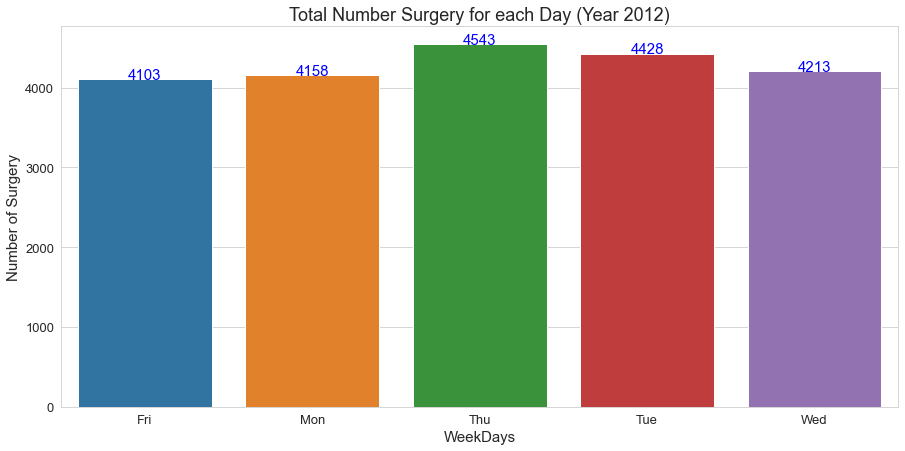

In [126]:
fig=plt.figure(figsize=(15,7))
sns.set_style("whitegrid")
plt.ticklabel_format(style='plain')

groupedvalues=Surgery2012.groupby('DOW').sum().reset_index()

h=sns.barplot(x='DOW',y='Actual',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    h.text(row.name,row.Actual, round(row.Actual), color='blue', ha="center",fontsize=15)
    
h.set_xlabel("WeekDays" , fontsize=15)
h.set_ylabel("Number of Surgery" , fontsize=15)

plt.title('Total Number Surgery for each Day (Year 2012)',fontsize=18)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.show()
fig.savefig("filename.png", dpi=200)

In [127]:
Monday=  Surgery_data[(Surgery_data['DOW']=='Mon') ]
Tuesday=  Surgery_data[(Surgery_data['DOW']=='Tue') ]
Wednesday=  Surgery_data[(Surgery_data['DOW']=='Wed') ]
Thursday=  Surgery_data[(Surgery_data['DOW']=='Thu') ]
Friday=  Surgery_data[(Surgery_data['DOW']=='Fri') ]
Surgery2012=Surgery_data[Surgery_data.index>='2012-01-01']
Surgery2011=Surgery_data[Surgery_data.index<'2012-01-01']

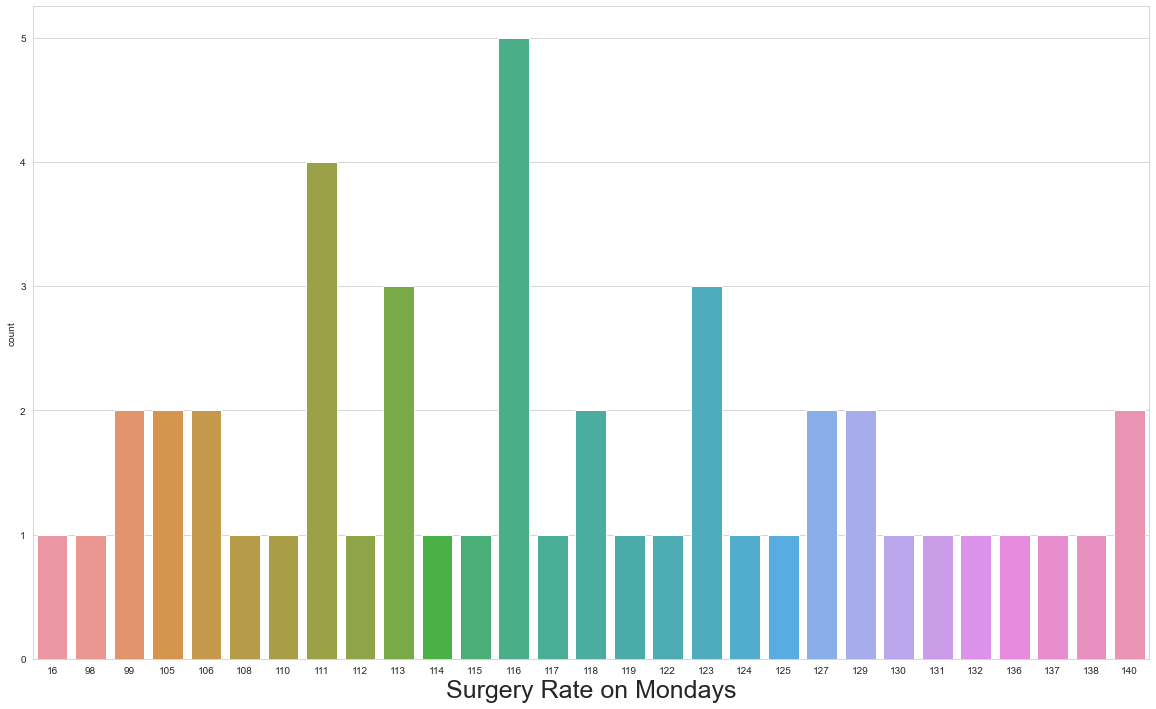

In [134]:
fig=plt.figure(figsize=(20,12))
sns.countplot(x='Actual',data=Monday)

plt.xlabel("Surgery Rate on Mondays",fontsize=25);
fig.savefig("filename.png", dpi=200)

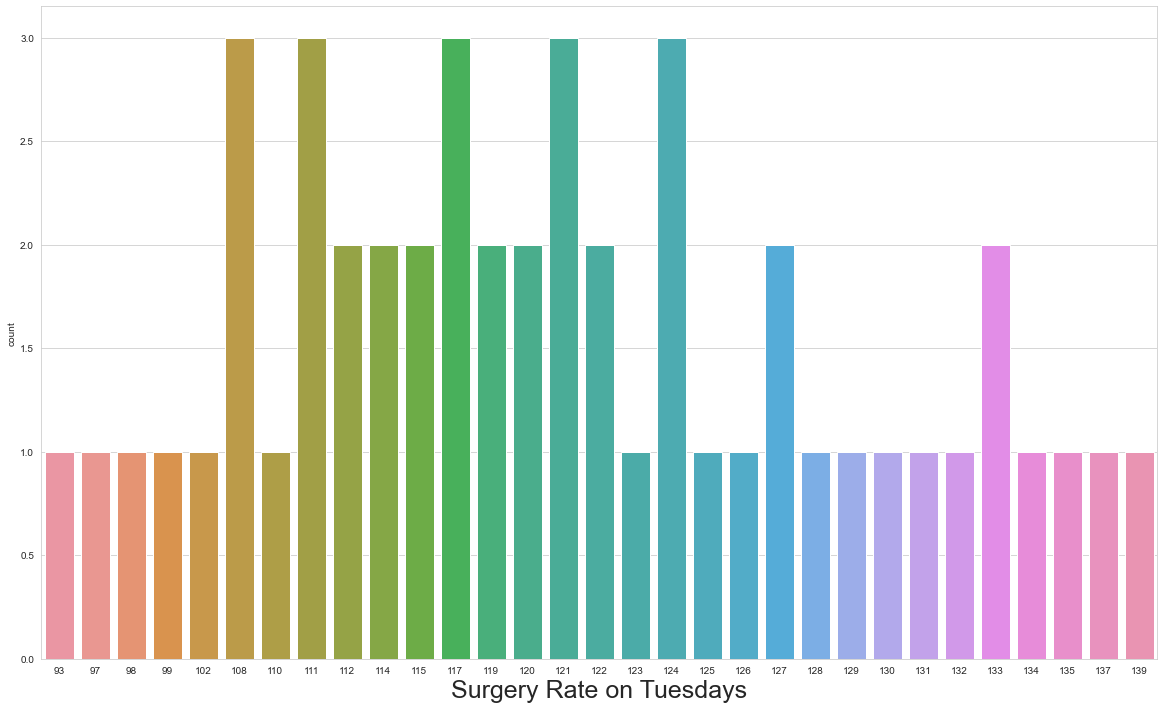

In [135]:
fig=plt.figure(figsize=(20,12))
sns.countplot(x='Actual',data=Tuesday)

plt.xlabel("Surgery Rate on Tuesdays",fontsize=25);
fig.savefig("filename.png", dpi=200)

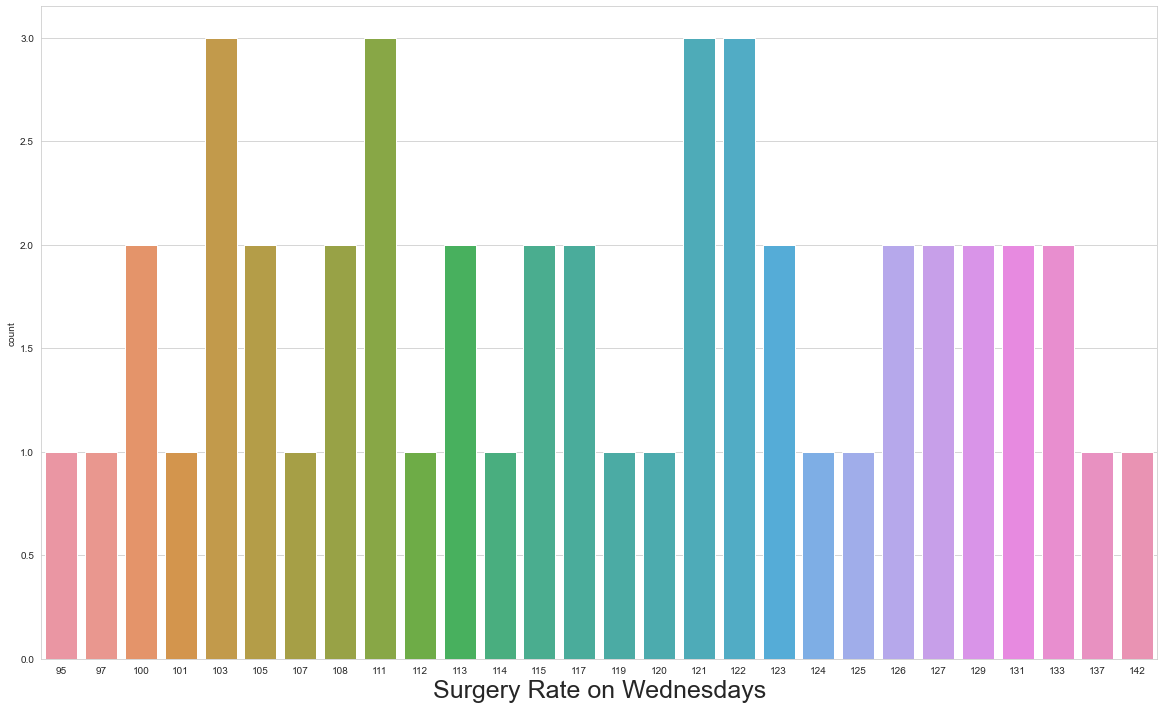

In [136]:
fig=plt.figure(figsize=(20,12))
sns.countplot(x='Actual',data=Wednesday)

plt.xlabel("Surgery Rate on Wednesdays",fontsize=25);
fig.savefig("filename.png", dpi=200)

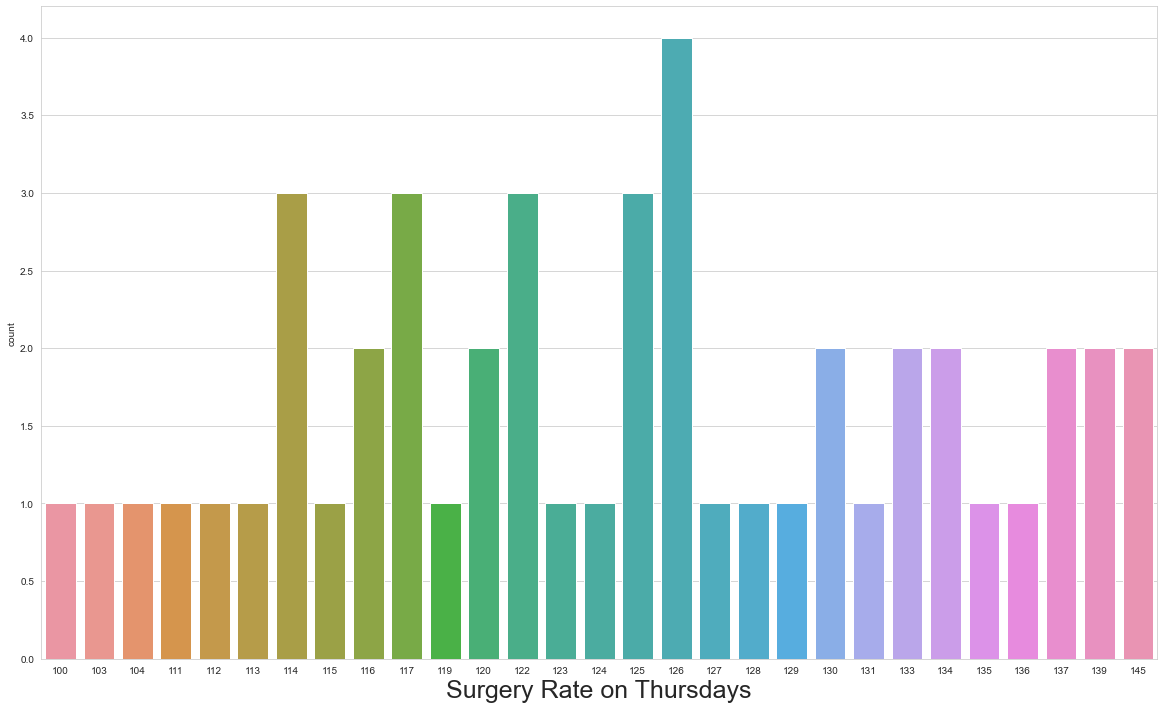

In [137]:
fig=plt.figure(figsize=(20,12))
sns.countplot(x='Actual',data=Thursday)

plt.xlabel("Surgery Rate on Thursdays",fontsize=25);
fig.savefig("filename.png", dpi=200)

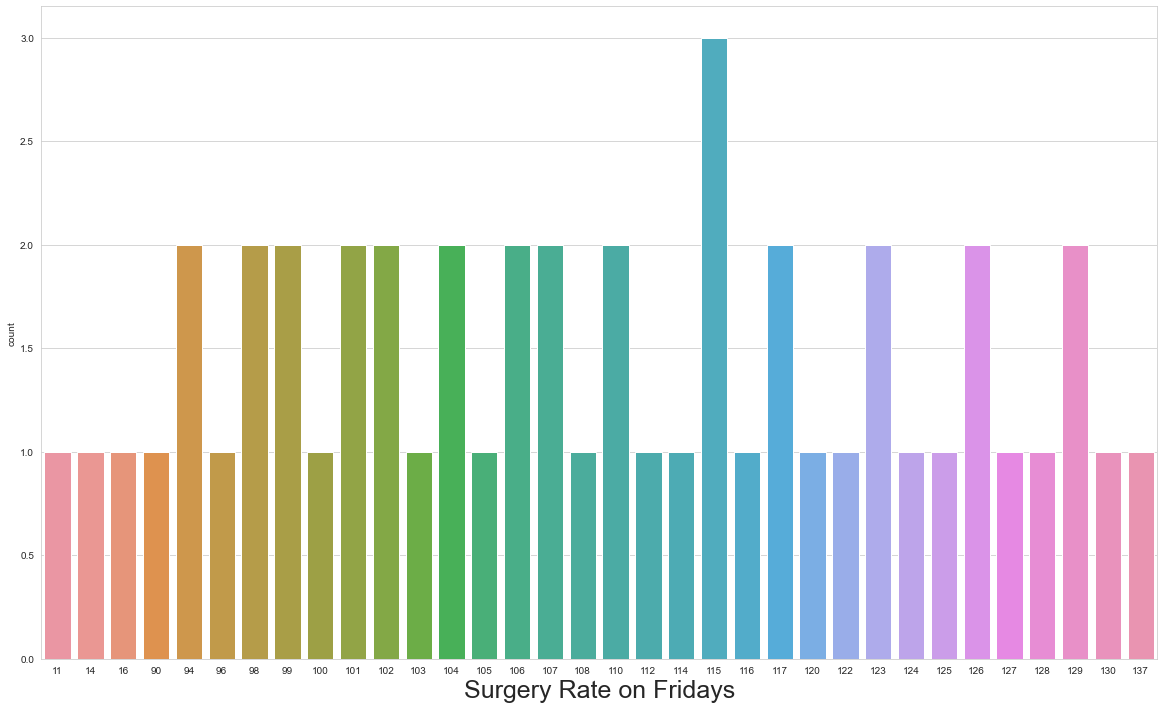

In [138]:
fig=plt.figure(figsize=(20,12))
sns.countplot(x='Actual',data=Friday)

plt.xlabel("Surgery Rate on Fridays",fontsize=25);
fig.savefig("filename.png", dpi=200)

In [338]:
Surgery_data.head()

,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
SurgDate,,,,,,,,,,,,,,,,,,
2011-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
2011-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2011-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
2011-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
2011-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106


In [388]:
X = Surgery_data.values[:,1:17]  # get input values from first two columns
y = Surgery_data.values[:, 17]  # get output values from last coulmn
m = len(y) # Number of training examples

print('Total no of training examples (m) = %s \n' %(m))

# Show only first 5 records
for i in range(5):
    print('X =', X[i, ], ', y =', y[i])

Total no of training examples (m) = 241 

X = [38 45 60 63 65 70 73 73 73 80 84 89 94 98 100 104] , y = 106
X = [35 47 65 68 78 82 82 82 86 89 92 95 99 99 99 114] , y = 121
X = [26 43 54 62 72 72 72 74 87 94 96 101 102 102 106 114] , y = 126
X = [28 48 65 70 72 72 72 82 87 91 94 94 94 97 98 103] , y = 114
X = [31 40 50 50 50 54 62 68 71 73 73 73 78 83 87 94] , y = 106


In [389]:
from sklearn import linear_model
model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(X,y) 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

LinearRegression(normalize=True)

In [390]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)



coef=  [-0.03849495  0.08894647 -0.10006749  0.09931697  0.04661235 -0.17492215
  0.0169209   0.10898357  0.00997799  0.14720389 -0.13877186 -0.04746656
  0.08122443 -0.16269802  0.1287132   0.91214059]
intercept=  10.875548176447765


In [392]:
predictedrental = pd.DataFrame(model_ols.predict(X), columns=['Past Surgery'])
actualrental = pd.DataFrame(y, columns=['Actual Surgery'])
actualrental = actualrental.reset_index(drop=True) 
df_actual_vs_predicted = pd.concat([actualrental,predictedrental],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
Actual Surgery,106,121,126,114,106,111,122,127,116,99,...,124,114,103,126,103,118,108,121,114,102
Past Surgery,109.693,118.918,120.405,110.607,102.177,109.015,119.594,125.092,123.673,95.1821,...,122.724,120.648,101.473,124.793,99.4763,116.263,105.168,120.165,113.28,108.383


In [393]:

plt.figure(figsize=(62,35),dpi=400)
plt.scatter(y, model_ols.predict(X),)

plt.rcParams["figure.figsize"] = (10,6) 


plt.title("Rental From Dataset Vs Rental Predicted By Model",fontsize=55)
plt.xlabel('Rental',fontsize=45)
plt.ylabel('Rental Predicted By Model',fontsize=45)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [394]:
rental = model_ols.predict([[38 ,45 ,60 ,63, 65, 70 ,73 ,73, 73, 80, 84, 89, 94, 98, 100 ,104]])
print('Predicted number of Surgery :', rental)

Predicted number of Surgery : [109.69250532]


# Regression Analysis

In [140]:
Surgery_data.head()

,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
SurgDate,,,,,,,,,,,,,,,,,,
2011-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
2011-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2011-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
2011-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
2011-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106


In [141]:


## Monday
Monday.loc[:,'T - 7']
Monday.loc[:,'Actual'].values.reshape(-1, 1).shape

Monday_X = Monday.loc[:, 'T - 7'].values.reshape(-1, 1)  
Monday_Y = Monday.loc[:, 'Actual'].values.reshape(-1, 1) 

Monday_regression = LinearRegression() 
Monday_regression.fit(Monday_X, Monday_Y)  
Monday_Y_pred = Monday_regression.predict(Monday_X )

#find the R^2 values 
reg=LinearRegression().fit(Monday_X,Monday_Y)
reg.score(Monday_X,Monday_Y)
print('R square (T - 7) vs Actual for    Monday is equal to ', reg.score(Monday_X,Monday_Y)) 

## Tuesday
Tuesday.loc[:,'T - 7']
Tuesday.loc[:,'Actual'].values.reshape(-1, 1).shape

Tuesday_X = Tuesday.loc[:, 'T - 7'].values.reshape(-1, 1)  
Tuesday_Y = Tuesday.loc[:, 'Actual'].values.reshape(-1, 1) 

Tuesday_regression = LinearRegression() 
Tuesday_regression.fit(Tuesday_X, Tuesday_Y)  
Tuesday_Y_pred = Tuesday_regression.predict(Tuesday_X )

#find the R^2 values 
reg=LinearRegression().fit(Tuesday_X,Tuesday_Y)
reg.score(Tuesday_X,Tuesday_Y)
print('R square (T -7) vs Actual for   Tuesday is equal to ', reg.score(Tuesday_X,Tuesday_Y)) 

## Wednesday
Wednesday.loc[:,'T - 7']
Wednesday.loc[:,'Actual'].values.reshape(-1, 1).shape

Wednesday_X = Wednesday.loc[:, 'T - 7'].values.reshape(-1, 1)  
Wednesday_Y = Wednesday.loc[:, 'Actual'].values.reshape(-1, 1) 

Wednesday_regression = LinearRegression() 
Wednesday_regression.fit(Wednesday_X, Wednesday_Y)  
Wednesday_Y_pred = Wednesday_regression.predict(Wednesday_X )

#find the R^2 values 
reg=LinearRegression().fit(Wednesday_X,Wednesday_Y)
reg.score(Wednesday_X,Wednesday_Y)
print('R square (T - 7) vs Actual for Wednesday is equal to ', reg.score(Wednesday_X,Wednesday_Y))

## Thursday
Thursday.loc[:,'T - 7']
Thursday.loc[:,'Actual'].values.reshape(-1, 1).shape

Thursday_X = Thursday.loc[:, 'T - 7'].values.reshape(-1, 1)  
Thursday_Y = Thursday.loc[:, 'Actual'].values.reshape(-1, 1) 

Thursday_regression = LinearRegression() 
Thursday_regression.fit(Thursday_X, Thursday_Y)  
Thursday_Y_pred = Thursday_regression.predict(Thursday_X )

#find the R^2 values 
reg=LinearRegression().fit(Thursday_X,Thursday_Y)
reg.score(Thursday_X,Thursday_Y)
print('R square (T - 7) vs Actual for  Thursday is equal to ', reg.score(Thursday_X,Thursday_Y)) 

## Friday
Friday.loc[:,'T - 7']
Friday.loc[:,'Actual'].values.reshape(-1, 1).shape

Friday_X = Friday.loc[:, 'T - 7'].values.reshape(-1, 1)  
Friday_Y = Friday.loc[:, 'Actual'].values.reshape(-1, 1) 

Friday_regression = LinearRegression() 
Friday_regression.fit(Friday_X, Friday_Y)  
Friday_Y_pred = Friday_regression.predict(Friday_X )

#find the R^2 values 
reg=LinearRegression().fit(Friday_X,Friday_Y)
reg.score(Friday_X,Friday_Y)
print('R square (T - 7) vs Actual for    Friday is equal to ', reg.score(Friday_X,Friday_Y)) 

max(reg.score(Monday_X,Monday_Y),reg.score(Tuesday_X,Tuesday_Y),reg.score(Wednesday_X,Wednesday_Y)
   ,reg.score(Thursday_X,Thursday_Y),reg.score(Friday_X,Friday_Y))

print('Best fit for (T - 7) is equal to',max(reg.score(Monday_X,Monday_Y),reg.score(Tuesday_X,Tuesday_Y),reg.score(Wednesday_X,Wednesday_Y)
   ,reg.score(Thursday_X,Thursday_Y),reg.score(Friday_X,Friday_Y)) )

R square (T - 7) vs Actual for    Monday is equal to  0.8249855171010343
R square (T -7) vs Actual for   Tuesday is equal to  0.5374665148734139
R square (T - 7) vs Actual for Wednesday is equal to  0.6684289424818737
R square (T - 7) vs Actual for  Thursday is equal to  0.6154385108447944
R square (T - 7) vs Actual for    Friday is equal to  0.9158867220957229
Best fit for (T - 7) is equal to 0.9158867220957229


In [142]:
Surgery_data.loc[:,'T - 7']
Friday.loc[:,'Actual'].values.reshape(-1, 1).shape

Surgery_data_X = Surgery_data.loc[:, 'T - 7'].values.reshape(-1, 1)  
Surgery_data_Y = Surgery_data.loc[:, 'Actual'].values.reshape(-1, 1) 

Surgery_data_regression = LinearRegression() 
Surgery_data_regression.fit(Surgery_data_X, Surgery_data_Y)  
Surgery_data_Y_pred = Surgery_data_regression.predict(Surgery_data_X )

#find the R^2 values 
reg=LinearRegression().fit(Surgery_data_X,Surgery_data_Y)
reg.score(Surgery_data_X,Surgery_data_Y)
print('R square (T - 7) vs Actual for    Surgery_data_Y is equal to ', reg.score(Surgery_data_X,Surgery_data_Y)) 



R square (T - 7) vs Actual for    Surgery_data_Y is equal to  0.8024195012892146


# **********************

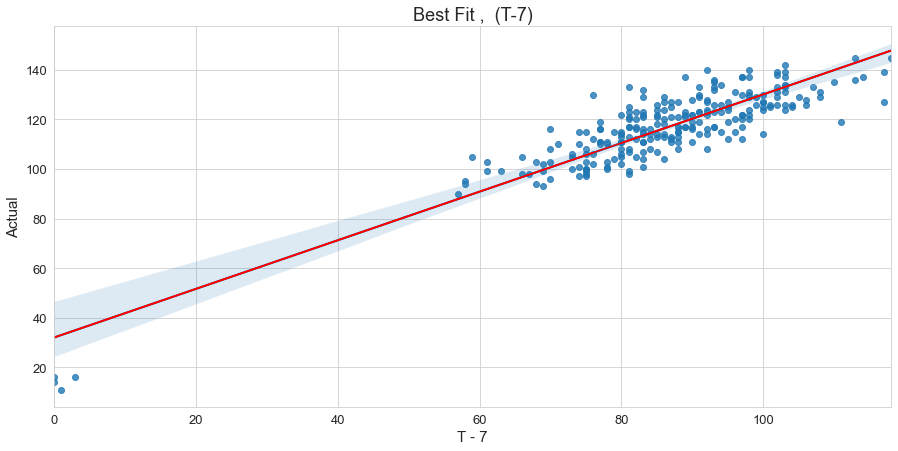

In [169]:
#Plot it
plt.figure(figsize=(15,7))
sns.regplot(x=Surgery_data_X,y=Surgery_data_Y)
plt.plot(Surgery_data_X, Surgery_data_Y_pred, color='red') # line color changing
plt.xlabel("T - 7",fontsize=15);
plt.ylabel("Actual",fontsize=15);
plt.title("Best Fit ,  (T-7)",fontsize=18);
plt.yticks(fontsize=13);
plt.xticks(fontsize=13);



In [171]:
##################################################################################################################

In [ ]:
#################################### Metrics ###################################################

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [174]:
Surgery_data.columns

Index(['DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11',
       'T - 10', 'T - 9', 'T - 8', 'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3',
       'T - 2', 'T - 1', 'Actual'],
      dtype='object')

In [175]:
X = Surgery_data[[ 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12', 'T - 11',
       'T - 10', 'T - 9', 'T - 8', 'T - 7', 'T - 6', 'T - 5', 'T - 4', 'T - 3',
       'T - 2', 'T - 1']]

In [176]:
Y=Surgery_data['Actual']

In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [181]:
lm = LinearRegression()

In [182]:
lm.fit(X_train,Y_train)

LinearRegression()

In [183]:
lm.coef_         # coefficient f

array([-0.0967853 ,  0.1111372 , -0.0966222 ,  0.01358328, -0.06430056,
        0.03559439,  0.05140818,  0.1098975 ,  0.0130642 ,  0.08793461,
        0.05653263, -0.19679361,  0.11576639, -0.26250417,  0.07520226,
        1.0002753 ])

In [184]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
cdf

# if we hold all other fetures fixed, a one unit increse in T-28 is associated with decrese of (-0.029937 % of Total number of Surgery)

,Coefficient
T - 28,-0.096785
T - 21,0.111137
T - 14,-0.096622
T - 13,0.013583
T - 12,-0.064301
T - 11,0.035594
T - 10,0.051408
T - 9,0.109897
T - 8,0.013064
T - 7,0.087935


In [185]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

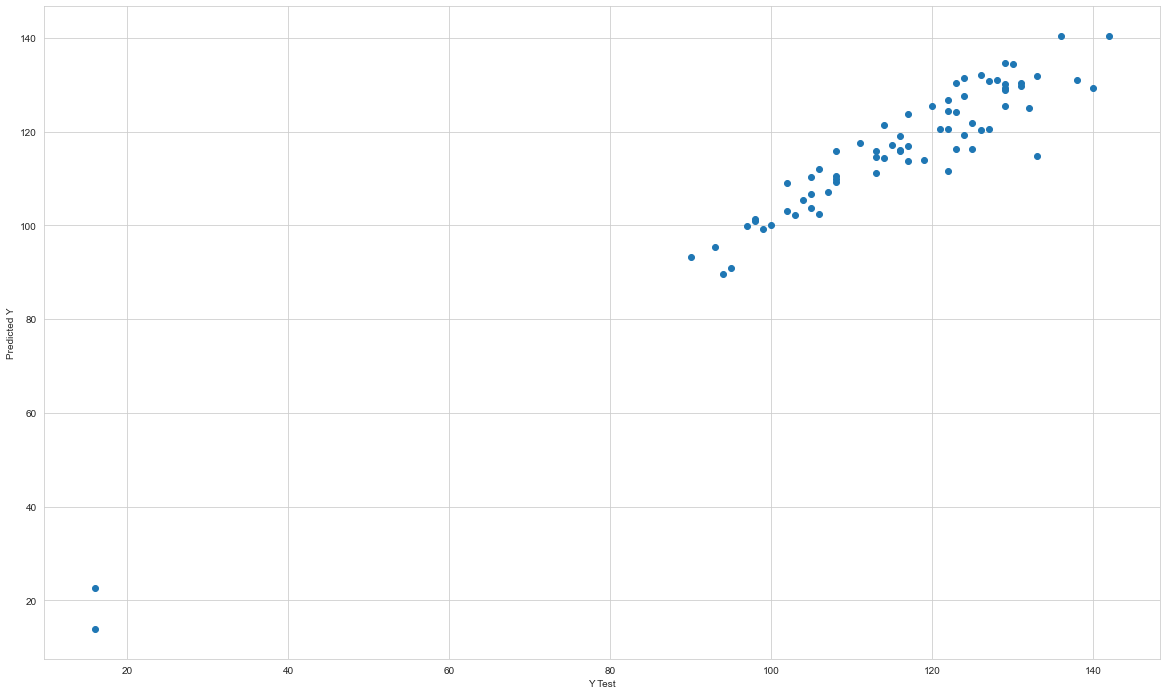

In [186]:
plt.figure(figsize=(20,12))
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

C:\Users\amina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


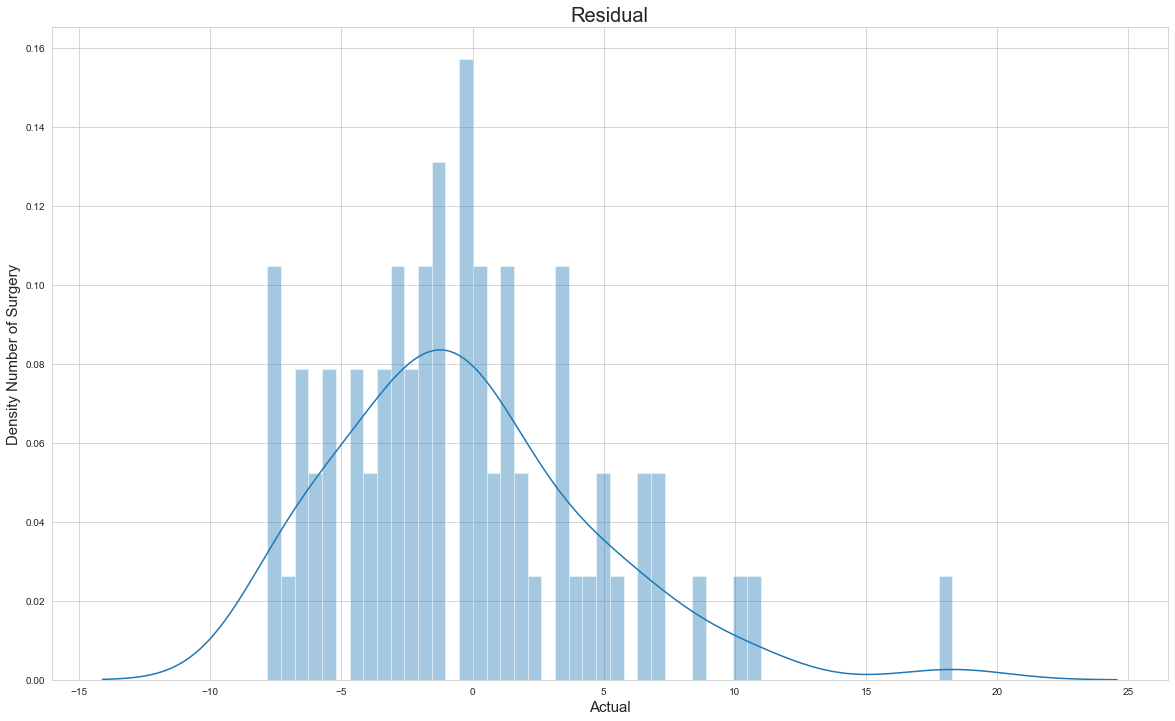

In [295]:
plt.figure(figsize=(20,12))
sns.distplot((Y_test-predictions),bins=50);  # a histogram of the residuals. Should looks normal   # means equal to 0
plt.title('Residual',fontsize=20)
plt.ylabel('Density Number of Surgery',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.savefig("savetest.png", dpi=200)

In [299]:
pip install --upgrade scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\amina\\anaconda3\\Lib\\site-packages\\~klearn\\linear_model\\_cd_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [194]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
T - 28,-0.096785
T - 21,0.111137
T - 14,-0.096622
T - 13,0.013583
T - 12,-0.064301
T - 11,0.035594
T - 10,0.051408
T - 9,0.109897
T - 8,0.013064
T - 7,0.087935


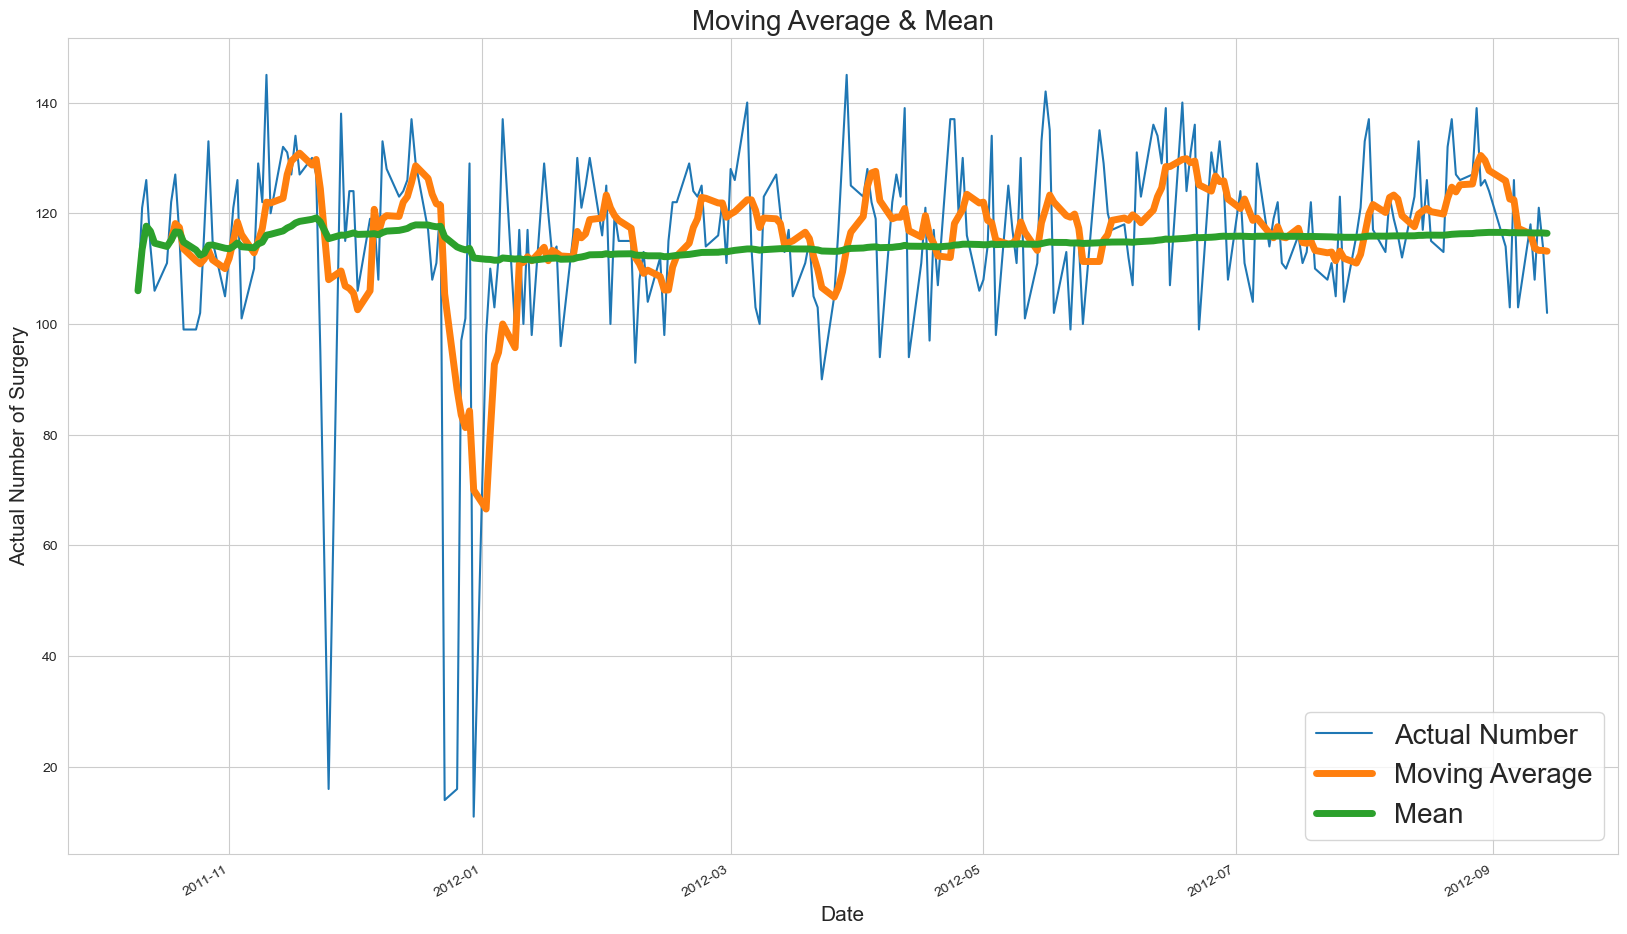

In [248]:
plt.figure(figsize=(12,6), dpi=100)

Surgery_data['Actual'].plot(figsize=(20,12))
Surgery_data.rolling(window=7).mean()['Actual'].plot(linewidth=5)     ## Moving Average


Surgery_data['Actual'].expanding().mean().plot(linewidth=5); ## Mean

plt.legend(['Actual Number','Moving Average', 'Mean'],fontsize=20)
plt.title('Moving Average & Mean',fontsize=20)
plt.ylabel('Actual Number of Surgery',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.savefig("savetest.png", dpi=200)

In [48]:
pd.read_csv(Surgery_filepath)
Surgery_data = pd.read_csv(Surgery_filepath, parse_dates=True)

In [60]:
Surgery_data.head()

,ds,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,y
0,2011-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,2011-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,2011-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,2011-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,2011-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106


In [62]:
print(Surgery_data['ds'].dtypes)

object


In [63]:
Surgery_data['ds']=pd.to_datetime(Surgery_data['ds'])

In [64]:
print(Surgery_data['ds'].dtypes)

datetime64[ns]


In [65]:
Surgery_data.isnull().sum()

ds        0
DOW       0
T - 28    0
T - 21    0
T - 14    0
T - 13    0
T - 12    0
T - 11    0
T - 10    0
T - 9     0
T - 8     0
T - 7     0
T - 6     0
T - 5     0
T - 4     0
T - 3     0
T - 2     0
T - 1     0
y         0
dtype: int64

In [52]:
#Surgery_data = Surgery_data.rename(columns = {"SurgDate": "ds", "Actual": "y"}) 

In [57]:
Surgery_data.head()

,ds,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,y
0,2011-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,2011-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,2011-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,2011-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,2011-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106


In [66]:
Surgery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      241 non-null    datetime64[ns]
 1   DOW     241 non-null    object        
 2   T - 28  241 non-null    int64         
 3   T - 21  241 non-null    int64         
 4   T - 14  241 non-null    int64         
 5   T - 13  241 non-null    int64         
 6   T - 12  241 non-null    int64         
 7   T - 11  241 non-null    int64         
 8   T - 10  241 non-null    int64         
 9   T - 9   241 non-null    int64         
 10  T - 8   241 non-null    int64         
 11  T - 7   241 non-null    int64         
 12  T - 6   241 non-null    int64         
 13  T - 5   241 non-null    int64         
 14  T - 4   241 non-null    int64         
 15  T - 3   241 non-null    int64         
 16  T - 2   241 non-null    int64         
 17  T - 1   241 non-null    int64         
 18  y       24

In [67]:
Surgery_data_test = Surgery_data[(Surgery_data['ds'] >= dt.datetime(2012,6,30)) & (Surgery_data['ds'] <= dt.datetime(2012,9,14))]
## Fill in the missing components in the following line: 
Surgery_data_train = Surgery_data[(Surgery_data['ds'] < dt.datetime(2012,6,29)) & (Surgery_data['ds'] >= dt.datetime(2011,10,10))]
Surgery_data_test = Surgery_data_test.reset_index(drop = True)
Surgery_data_train = Surgery_data_train.reset_index(drop = True)

In [68]:
Surgery_data_test = Surgery_data[(Surgery_data['ds'] >= dt.datetime(2012,8,30)) & (Surgery_data['ds'] <= dt.datetime(2012,9,14))]
## Fill in the missing components in the following line: 
Surgery_data_train = Surgery_data[(Surgery_data['ds'] < dt.datetime(2012,8,29)) & (Surgery_data['ds'] >= dt.datetime(2011,10,10))]
Surgery_data_test = Surgery_data_test.reset_index(drop = True)
Surgery_data_train = Surgery_data_train.reset_index(drop = True)

In [269]:
pred = pd.DataFrame(Surgery_data_test['ds'])
pred = pred.reset_index(drop = True)
h_max = 52 + 1
## Your code here to find the values of yT, y1, T, and m
yT = Surgery_data_train['y'][len(Surgery_data_train) - 1]
y1 = Surgery_data_train['y'][0]
T = len(Surgery_data_train)
m = 7

In [270]:
#Mean Baseline
pred['mean_baseline'] = Surgery_data_train['y'].mean()
#Naive Baseline
pred['naive_baseline'] = yT

In [271]:
pred_list = []
for h in range(1, h_max + 1): 
  k = math.floor((h - 1)/m)
  index = T + h - m * (k + 1)
  pred_list.append(Surgery_data['y'][index - 1])
pred['seasonal_naive_baseline'] = pred_list

In [272]:
drift_list = []
for h in range(1, h_max+1): 
  result = yT + h * ((yT-y1) / T-1)
  drift_list.append(result)
pred['drift_baseline'] = drift_list

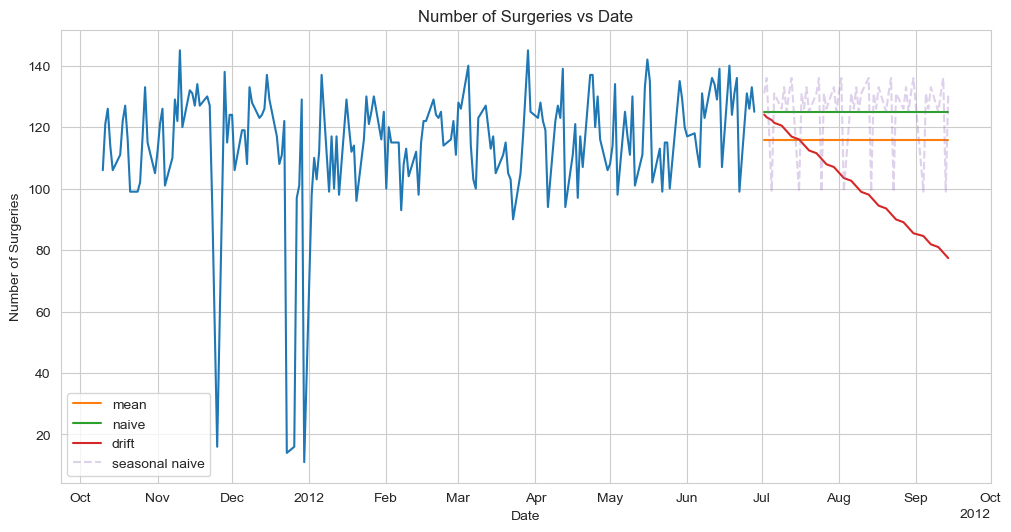

In [273]:
plt.figure(figsize=(12,6), dpi=100)
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)



plt.plot(Surgery_data_train['ds'], Surgery_data_train['y'])

## Your plotting code here to add the baseline methods

plt.plot(pred['ds'], pred['mean_baseline'], label = 'mean')
plt.plot(pred['ds'], pred['naive_baseline'], label = 'naive')
plt.plot(pred['ds'], pred['drift_baseline'], label = 'drift')
plt.plot(pred['ds'], pred['seasonal_naive_baseline'], label = 'seasonal naive', linestyle = '--', alpha = 0.3)
plt.xlabel('Date')
plt.ylabel('Number of Surgeries')
plt.title('Number of Surgeries vs Date')
plt.legend()
plt.show()